In [127]:
import numpy as np
import pandas as pd
import re

In [128]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [129]:
df = pd.read_csv(r"C:\Users\umar\anaconda files\Major_project\Major_projects_data\gurgaon_properties_cleaned_v1.csv")

In [130]:
df.duplicated().sum()

np.int64(122)

In [131]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,emaar gurgaon greens,sector 102,1.35,8181.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,servant room,5.0,North-West,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


## 1. areaWithType

In [132]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3549,2.75,2557.0,Super Built up area 2557(237.55 sq.m.)Carpet area: 2550 sq.ft. (236.9 sq.m.)
266,1.20,1333.0,Super Built up area 1250(116.13 sq.m.)Carpet area: 750 sq.ft. (69.68 sq.m.)
3405,2.07,1812.0,Super Built up area 1812(168.34 sq.m.)
2581,1.30,1351.0,Super Built up area 1351(125.51 sq.m.)
1877,1.28,1340.0,Carpet area: 1340 (124.49 sq.m.)


In [133]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [134]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [135]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [136]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [137]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
318,1.33,flat,2390.0,Super Built up area 2390(222.04 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),2390.0,NaN,2000.0
3097,0.50,flat,1000.0,Super Built up area 1000(92.9 sq.m.),1000.0,NaN,NaN
1612,2.20,flat,1760.0,Carpet area: 1760 (163.51 sq.m.),NaN,NaN,1760.0
2709,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
1561,0.20,flat,750.0,Super Built up area 750(69.68 sq.m.)Built Up area: 743 sq.ft. (69.03 sq.m.)Carpet area: 600 sq.ft. (55.74 sq.m.),750.0,743.0,600.0


In [138]:
df.duplicated().sum()

np.int64(122)

In [139]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [140]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.80,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
4,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
9,1.10,house,1782.0,Plot area 1782(165.55 sq.m.),NaN,NaN,NaN
23,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
25,7.60,house,1961.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN


In [141]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
super_built_up_area    1887
built_up_area          2615
carpet_area            1859
dtype: int64

In [142]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [143]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.80,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
4,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
9,1.10,house,1782.0,Plot area 1782(165.55 sq.m.),NaN,NaN,NaN
23,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
25,7.60,house,1961.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN


In [144]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [145]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [146]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [147]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.80,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
4,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
9,1.10,house,1782.0,Plot area 1782(165.55 sq.m.),NaN,1782.00,NaN
23,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
25,7.60,house,1961.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
32,0.70,house,999.0,Plot area 111(92.81 sq.m.),NaN,111.00,NaN
37,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
47,1.30,house,1125.0,Plot area 1125(104.52 sq.m.),NaN,1125.00,NaN
70,26.00,house,4545.0,Plot area 505(422.24 sq.m.),NaN,505.00,NaN
72,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN


In [148]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [149]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [150]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.80,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
4,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,9000.00,NaN
9,1.10,house,1782.0,Plot area 1782(165.55 sq.m.),NaN,1782.00,NaN
23,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,2300.50,NaN
25,7.60,house,1961.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
32,0.70,house,999.0,Plot area 111(92.81 sq.m.),NaN,999.00,NaN
37,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
47,1.30,house,1125.0,Plot area 1125(104.52 sq.m.),NaN,1125.00,NaN
70,26.00,house,4545.0,Plot area 505(422.24 sq.m.),NaN,4545.00,NaN
72,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN


In [151]:

# update the original dataframe
df.update(all_nan_df)

In [152]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
super_built_up_area    1887
built_up_area          2069
carpet_area            1859
dtype: int64

In [153]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,emaar gurgaon greens,sector 102,1.35,8181.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,servant room,5.0,North-West,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1650.0,NaN,1022.58
1,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,5 to 10 Year Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3160.0,2455.0,2240.00
2,flat,emaar palm heights,sector 77,2.25,11250.0,2000.0,Super Built up area 2000(185.81 sq.m.),3,3,3,servant room,22.0,NaN,0 to 1 Year Old,"['DLF Cyber City', 'Vatika Town Square', ""St. Xavier's High School"", 'Matrikiran School', 'Arvy Hospital', 'DPS']","['1 Geyser', '1 Stove', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']",2000.0,NaN,NaN
3,house,ansal sushant lok plots,sector 43,5.80,29974.0,1935.0,Plot area 215(179.77 sq.m.),6,6,3,"servant room,others",2.0,South-West,1 to 5 Year Old,"['Huda city centre metro station', 'Sector 42-43 metro station', 'New Life Church', 'Hanuman Mandir', 'Rbs ATM', 'Hdfc ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Gupta', 'Max Hospital', 'Paras Hospital Gurgaon', 'Dr. Kutbuddin Akbary', 'Sitaram Bhartia', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Arihant Hospital', 'Marwah Clinic', 'Guardian Pharmacy', 'Chikits

## 2.additionalRoom

In [154]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1586
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [155]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [156]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1667,not available,0,0,0,0,0
2617,not available,0,0,0,0,0
1089,not available,0,0,0,0,0
1576,others,0,0,0,0,1
593,others,0,0,0,0,1


In [157]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,emaar gurgaon greens,sector 102,1.35,8181.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,servant room,5.0,North-West,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1650.0,NaN,1022.58,0,1,0,0,0
1,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,5 to 10 Year Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3160.0,2455.0,2240.00,0,1,0,0,0
2,flat,emaar palm heights,sector 77,2.25,11250.0,2000.0,Super Built up area 2000(185.81 sq.m.),3,3,3,servant room,22.0,NaN,0 to 1 Year Old,"['DLF Cyber City', 'Vatika Town Square', ""St. Xavier's High School"", 'Matrikiran School', 'Arvy Hospital', 'DPS']","['1 Geyser', '1 Stove', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']",2000.0,NaN,NaN,0,1,0,0,0
3,house,ansal sushant lok plots,sector 43,5.80,29974.0,1935.0,Plot area 215(179.77 sq.m.),6,6,3,"servant room,others",2.0,South-West,1 to 5 Year Old,"['Huda city centre metro station', 'Sector 42-43 metro station', 'New Life Church', 'Hanuman Mandir', 'Rbs ATM', 'Hdfc ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Gupta', 'Max Hospital', 'Paras Hospital Gurgaon', 'Dr. Kutbuddin Akbary', 'Sitaram Bhartia', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivek

## 3.agePossession

In [158]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      89
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
By 2025                  4
Aug 2024                 4
Oct 2023                 4
Jul 2024                 4
Sep 2023                 4
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Feb 2024                 3
By 2027                  2
Oct 2025                 2
Sep 2025                 2
Apr 2026                 2
Dec 2026                 2
Jul 2025                 2
Jul 2027                 2
Mar 2025                 2
Jan 2026      

In [159]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [160]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [161]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     282
Name: count, dtype: int64

In [162]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,emaar gurgaon greens,sector 102,1.35,8181.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,servant room,5.0,North-West,Relatively New,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1650.0,NaN,1022.58,0,1,0,0,0
1,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,Moderately Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3160.0,2455.0,2240.00,0,1,0,0,0
2,flat,emaar palm heights,sector 77,2.25,11250.0,2000.0,Super Built up area 2000(185.81 sq.m.),3,3,3,servant room,22.0,NaN,New Property,"['DLF Cyber City', 'Vatika Town Square', ""St. Xavier's High School"", 'Matrikiran School', 'Arvy Hospital', 'DPS']","['1 Geyser', '1 Stove', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']",2000.0,NaN,NaN,0,1,0,0,0
3,house,ansal sushant lok plots,sector 43,5.80,29974.0,1935.0,Plot area 215(179.77 sq.m.),6,6,3,"servant room,others",2.0,South-West,Relatively New,"['Huda city centre metro station', 'Sector 42-43 metro station', 'New Life Church', 'Hanuman Mandir', 'Rbs ATM', 'Hdfc ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Gupta', 'Max Hospital', 'Paras Hospital Gurgaon', 'Dr. Kutbuddin Akbary', 'Sitaram Bhartia', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand H

## 4.furnishDetails

In [163]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2109,"['3 Wardrobe', '1 Exhaust Fan', '2 Geyser', '1 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
3618,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1981,[],"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting', 'Water softening plant']"
174,[],"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3436,"['7 Fan', '7 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [164]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\umar\AppData\Local\Temp\ipykernel_22680\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [165]:
furnishings_df.shape

(3802, 19)

In [166]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\umar\AppData\Local\Temp\ipykernel_22680\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [167]:
furnishings_df.sample(5)

,Modular Kitchen,Water Purifier,Light,Curtains,Bed,AC,Chimney,Sofa,TV,Dining Table,Stove,Microwave,Washing Machine,Fan,Exhaust Fan,Geyser,Wardrobe,Fridge
3331,1,0,15,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0
1712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,1,0,10,0,0,5,1,0,0,0,0,0,0,5,1,0,0,0
1860,1,1,0,0,0,6,1,0,0,0,1,0,0,0,1,6,0,0
3173,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [170]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

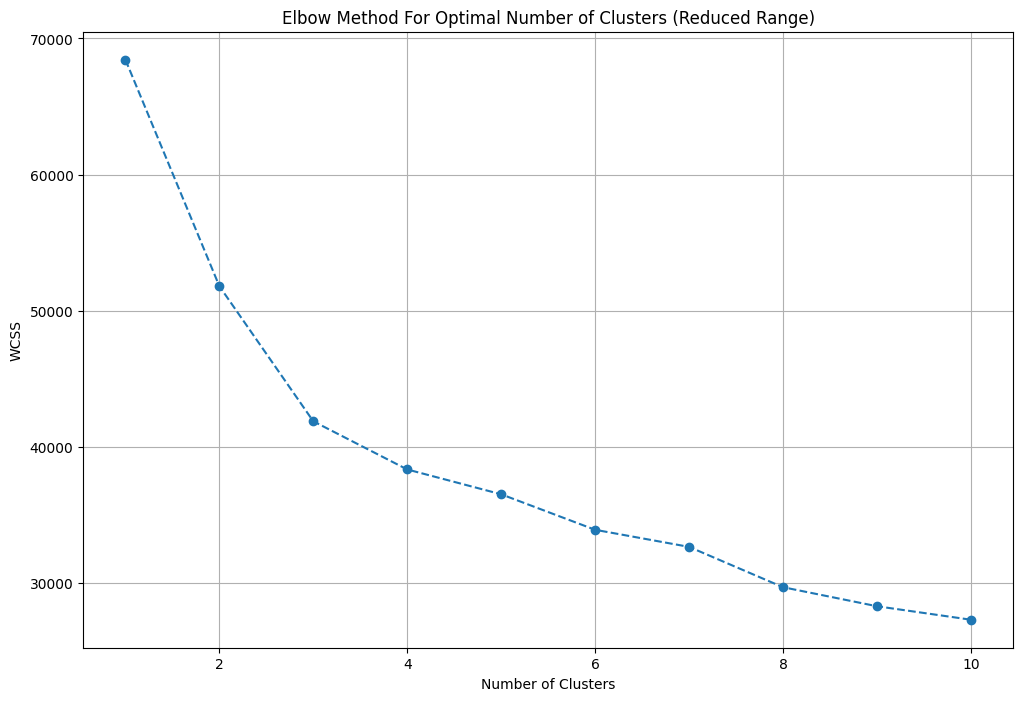

In [171]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [172]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [173]:
df = df.iloc[:,:-18]

In [174]:
df['furnishing_type'] = cluster_assignments

In [175]:

df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3203,NaN,1
3757,NaN,1
1073,"['5 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '10 Light', '5 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']",2
3043,"['4 Geyser', '9 Light', '1 AC', '1 Modular Kitchen', '4 Curtains', '4 Wardrobe', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
1966,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '6 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [176]:
df[['society','features']].sample(5)

,society,features
2626,tata primanti,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3486,m3m woodshire,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
1321,dlf the ultima,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
22,m3m woodshire,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2558,breez global hill view,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Waste Disposal']"


In [177]:
df['features'].isnull().sum()

np.int64(635)

In [178]:
import pandas as pd
app_df = pd.read_csv(r"C:\Users\umar\anaconda files\Major_project\Major_projects_data\appartments.csv")
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [179]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [180]:
temp_df = df[df['features'].isnull()]

In [181]:
temp_df.shape

(635, 26)

In [182]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [183]:
df.loc[temp_df.index,'features'] = x.values

In [184]:
df['features'].isnull().sum()

np.int64(481)

In [185]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [186]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [187]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1142,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
features_binary_df.shape

(3802, 130)

In [189]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

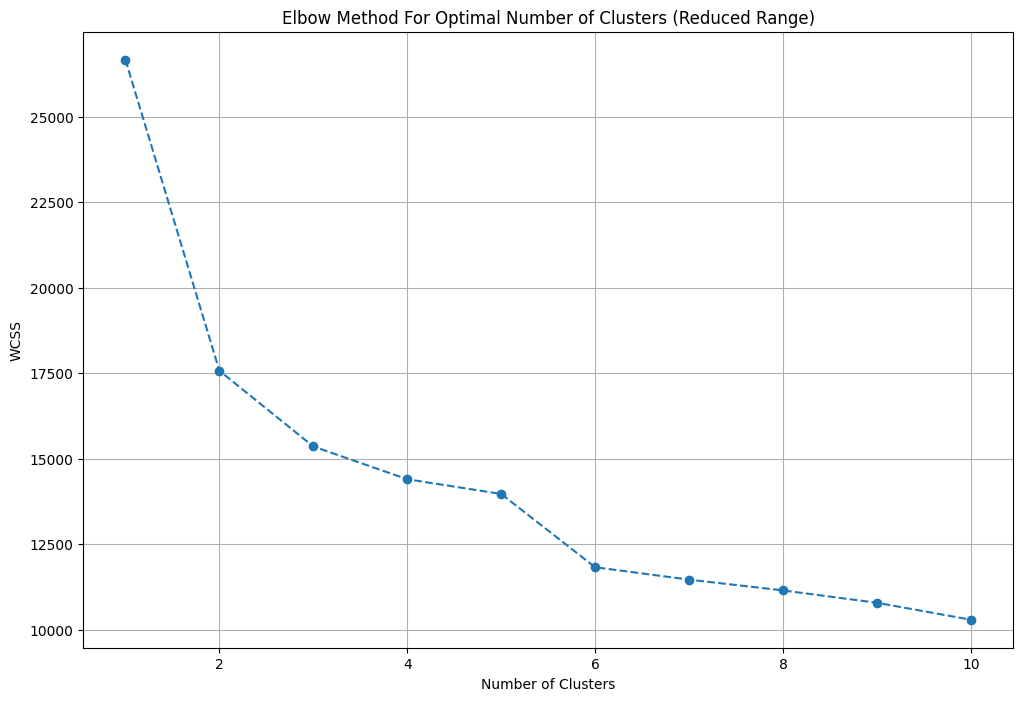

In [190]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [193]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [194]:
df['luxury_score'] = luxury_score

In [195]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,emaar gurgaon greens,sector 102,1.35,8181.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,servant room,5.0,North-West,Relatively New,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1650.0,NaN,1022.58,0,1,0,0,0,1,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",119
1,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,Moderately Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3160.0,2455.0,2240.00,0,1,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",119
2,flat,emaar palm heights,sector 77,2.25,11250.0,2000.0,Super Built up area 2000(185.81 sq.m.),3,3,3,servant room,22.0,NaN,New Property,"['DLF Cyber City', 'Vatika Town Square', ""St. Xavier's High School"", 'Matrikiran School', 'Arvy Hospital', 'DPS']","['1 Geyser', '1 Stove', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtai

In [196]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [197]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
898,flat,ss the leaf,sector 85,1.05,6163.0,1704.0,Super Built up area 1671(155.24 sq.m.),2,2,3+,7.0,West,Relatively New,1671.0,NaN,NaN,0,0,1,0,0,1,144
3444,flat,ats tourmaline,sector 109,1.40,8000.0,1750.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1466 sq.ft. (136.2 sq.m.),3,3,3+,5.0,East,Relatively New,1750.0,1466.0,NaN,0,0,0,0,0,1,44
2250,flat,"new colony, gurgaon",sector 7,0.80,8100.0,988.0,Carpet area: 990 (91.97 sq.m.),3,2,1,4.0,North-East,Relatively New,NaN,NaN,990.00,0,0,0,0,0,0,69
1044,house,suncity essel towers,sector 28,6.00,22222.0,2700.0,Plot area 300(250.84 sq.m.),4,4,3+,3.0,East,Old Property,NaN,2700.0,NaN,1,0,0,0,0,0,89
2395,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,17285.0,1128.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1128.09 sq.ft. (104.8 sq.m.),3,3,3,12.0,North-East,New Property,1852.0,NaN,1128.09,0,0,1,0,0,1,72


In [198]:
df.shape

(3802, 23)

In [199]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)